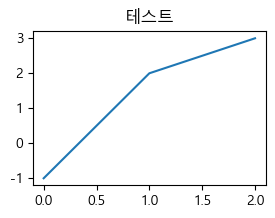

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
# 한글 폰트 설정
# ---------------------------------------

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))

# ---------------------------------------
# 그래프 전역 크기 설정
# ---------------------------------------
plt.rc('figure', figsize=(12,5))

pass


## 문제 정의
- 산불 발생 현황
- 산불 피해 현황
- 산불 주요 원인

## 데이터 수집

- 산불 발생 및 피해 현황 데이터
    - https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DMT_ZTITLE%26list_id%3DC_12%26obj_var_id%3D%26seqNo%3D%26tblId%3DTX_13601_A020%26vw_cd%3DMT_ZTITLE%26itm_id%3D%26language%3Dkor%26lang_mode%3Dko%26orgId%3D136%26

## 데이터 프레임 생성

In [2]:
# ----------------------------------------
# 데이터프레임 생성
#  - header : 헤더설정(중첩헤더 설정)
# ----------------------------------------

df = pd.read_csv('C:\\Users\\User\\Documents\\VSCode\\Data School\\data school\\00.data\\산불데이터\\산불피해_현황_20250415163909.csv',header=[0, 1])
df = df[1:].copy()
df.drop(columns=[('관리기관별(1)', '관리기관별(1)')], inplace=True)

In [3]:
# ----------------------------------------
# 인덱스라벨 설정
#  - 시점
# ----------------------------------------

df.set_index(('시점', '시점'), inplace=True)
df.index.name = '시점'

In [4]:
# ----------------------------------------
# 데이터프레임 확인
#   - head()
# ----------------------------------------

df.head()

원인 (건)                                                         산불피해  \
         합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
시점                                                                         
1996    527   248    -     73     -     -    38     30     -  138    527   
1997    524   247    -    103    41    29    33     10     -   61    524   
1998    265   104    -     65    24    13    16     11     -   32    265   
1999    315   156    -     57    13    21    20     10     -   38    315   
2000    729   312    -    134    68    63    47     18     -   87    729   

                                  인명피해 (명)          
       면적 (ha)   재적 (㎥)  피해액 (천원)       합계  사망  부상  
시점                                                  
1996   5367.63   363471  13321974       26  24   2  
1997   2329.79    40815   1628712       30  24   6  
1998   1014.00    44092   2516219       16  15   1  
1999    472.79     6377    665661        5   5   -  
2000  25606.75  1373302  65241772       30  13  17

In [5]:
# ----------------------------------------
# 데이터프레임 확인
#   - tail()
# ----------------------------------------

df.tail()

원인 (건)                                                         산불피해  \
         합계 입산자실화 규반소각 논밭두렁소각 쓰레기소각 담뱃불실화 성묘객실화 어린이불장난 건축물화재   기타 건수 (건)   
시점                                                                         
2020    620   217    -     49    65    75     9      1    54  150    620   
2021    349   133    -     22    27    34    16      3    20   94    349   
2022    756   253    -     44    59    53    14      -    51  282    756   
2023    596   170    -     56    73    56    23      1    41  176    596   
2024    279    49    -     24    28    36     6      1    14  121    279   

                                    인명피해 (명)         
       면적 (ha)   재적 (㎥)    피해액 (천원)       합계 사망  부상  
시점                                                   
2020   2919.84   486459   158140680        7  3   4  
2021    765.89     5641    36124769       14  7   7  
2022  24797.16  2925560  1346275384        8  1   7  
2023   4992.12   464130   285428594       19  3  16  
2024    131.94     5629     9244373        2  -   2

In [6]:
# ----------------------------------------
# 데이터프레임 확인
#   - info()
# ----------------------------------------

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1996 to 2024
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (원인 (건), 합계)      29 non-null     int64  
 1   (원인 (건), 입산자실화)   29 non-null     int64  
 2   (원인 (건), 규반소각)    29 non-null     object 
 3   (원인 (건), 논밭두렁소각)  29 non-null     int64  
 4   (원인 (건), 쓰레기소각)   29 non-null     object 
 5   (원인 (건), 담뱃불실화)   29 non-null     object 
 6   (원인 (건), 성묘객실화)   29 non-null     int64  
 7   (원인 (건), 어린이불장난)  29 non-null     object 
 8   (원인 (건), 건축물화재)   29 non-null     object 
 9   (원인 (건), 기타)      29 non-null     int64  
 10  (산불피해, 건수 (건))    29 non-null     object 
 11  (산불피해, 면적 (ha))   29 non-null     float64
 12  (산불피해, 재적 (㎥))    29 non-null     int64  
 13  (산불피해, 피해액 (천원))  29 non-null     int64  
 14  (인명피해 (명), 합계)    29 non-null     int64  
 15  (인명피해 (명), 사망)    29 non-null     object 
 16  (인명피해 (명), 부상)    29 non-null     object 
dtyp

## 자료형 변환
- 모든 데이터가 숫자형이어야 함
- 데이터타입이 문자열인 컬럼을 모두 찾아서 숫자형으로 변환
- `데이터프레임.select_dtypes(include=자료형)`
    - 특정 자료형을 가진 컬럼 선택
- str 접근자
    - 문자열 컬럼 전처리
    - `컬럼.str.문자열처리함수()`
    - `컬럼.str[인덱싱]`


In [7]:
# ----------------------------------------
#  type이 object인 컬럼라벨
# ----------------------------------------

object_cols = df.select_dtypes(include='object').columns
object_cols

MultiIndex([(  '원인 (건)',   '규반소각'),
            (  '원인 (건)',  '쓰레기소각'),
            (  '원인 (건)',  '담뱃불실화'),
            (  '원인 (건)', '어린이불장난'),
            (  '원인 (건)',  '건축물화재'),
            (    '산불피해', '건수 (건)'),
            ('인명피해 (명)',     '사망'),
            ('인명피해 (명)',     '부상')],
           )

In [8]:
# ----------------------------------------
#  '-' 을 0으로 변환한 후 int형으로 변환
# ----------------------------------------

for col in object_cols:
    df[col] = df[col].replace('-', 0)      # 문자열 '-'를 숫자 0으로
    df[col] = df[col].astype(int)          # 정수형으로 변환

In [9]:
# ----------------------------------------
#  확인
# dtypes
# ----------------------------------------

print(df.dtypes)

원인 (건)    합계            int64
          입산자실화         int64
          규반소각          int64
          논밭두렁소각        int64
          쓰레기소각         int64
          담뱃불실화         int64
          성묘객실화         int64
          어린이불장난        int64
          건축물화재         int64
          기타            int64
산불피해      건수 (건)        int64
          면적 (ha)     float64
          재적 (㎥)        int64
          피해액 (천원)      int64
인명피해 (명)  합계            int64
          사망            int64
          부상            int64
dtype: object


## 산불발생현황

#### 연도별 산불 발생 현황

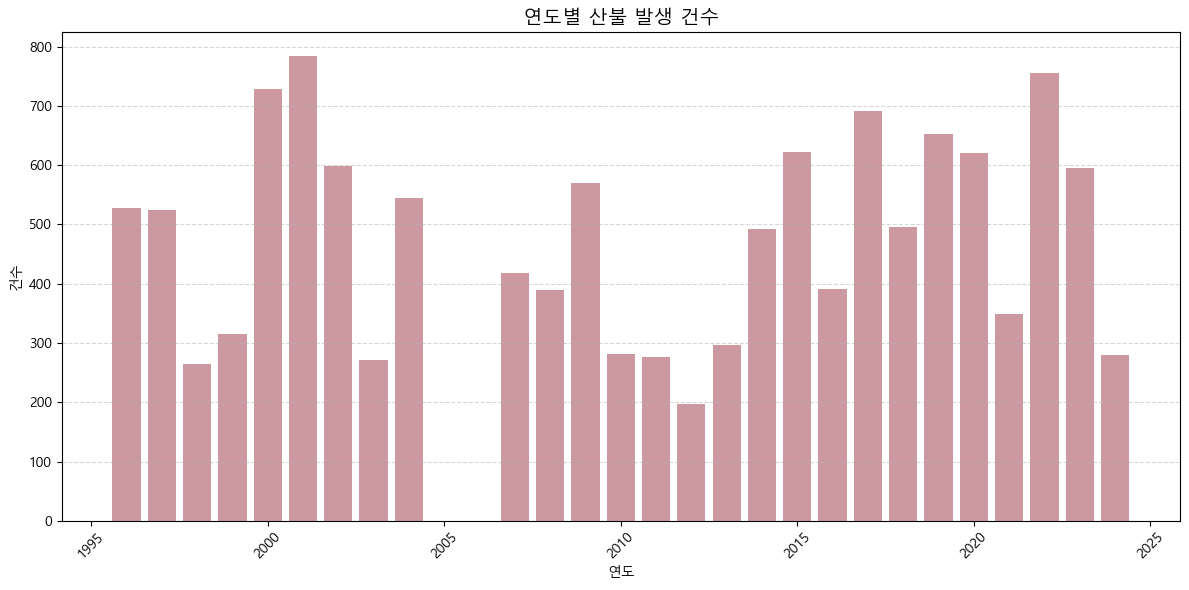

In [10]:
# ----------------------------------------
# 연도별 산불 발생 건수 시각화
# color = '#B76E79'
# ----------------------------------------

plt.figure(figsize=(12, 6))
plt.bar(df.index, df[('산불피해', '건수 (건)')], color='#B76E79', alpha=0.7)

plt.title('연도별 산불 발생 건수', fontsize=14)
plt.xlabel('연도')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 산불피해현황

### 연도별 산불 피해 면적

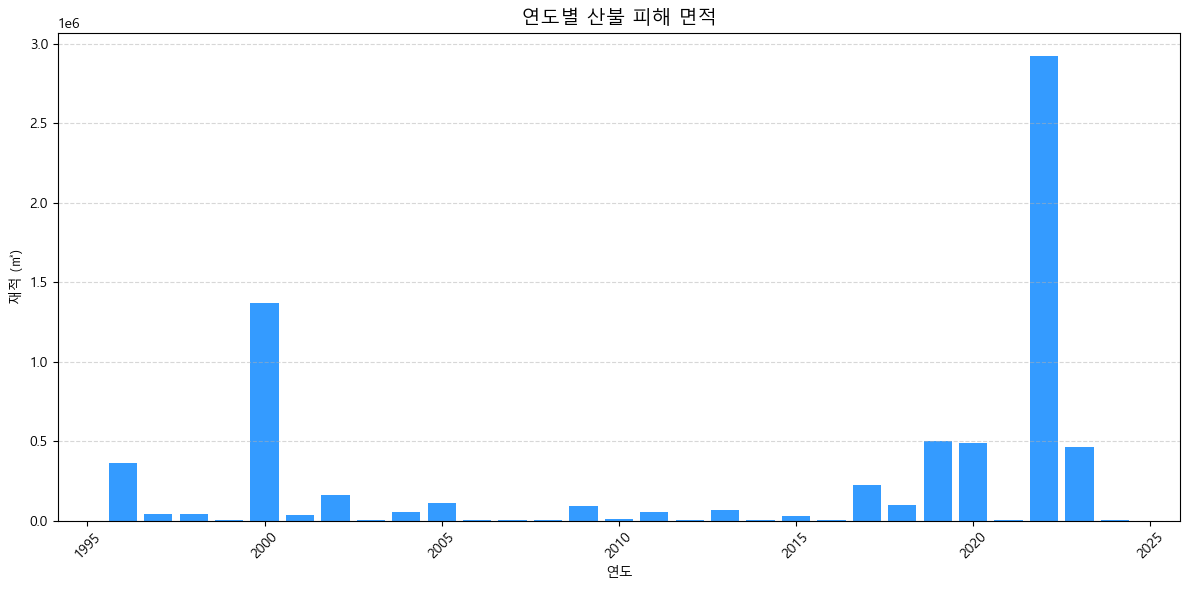

In [11]:
# ----------------------------------------
# 시각화 
# color='#1E90FF'
# ----------------------------------------

plt.figure(figsize=(12, 6))
plt.bar(df.index, df[('산불피해', '재적 (㎥)')], color='#1E90FF', alpha=0.9)

plt.title('연도별 산불 피해 면적', fontsize=14)
plt.xlabel('연도')
plt.ylabel('재적 (㎥)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

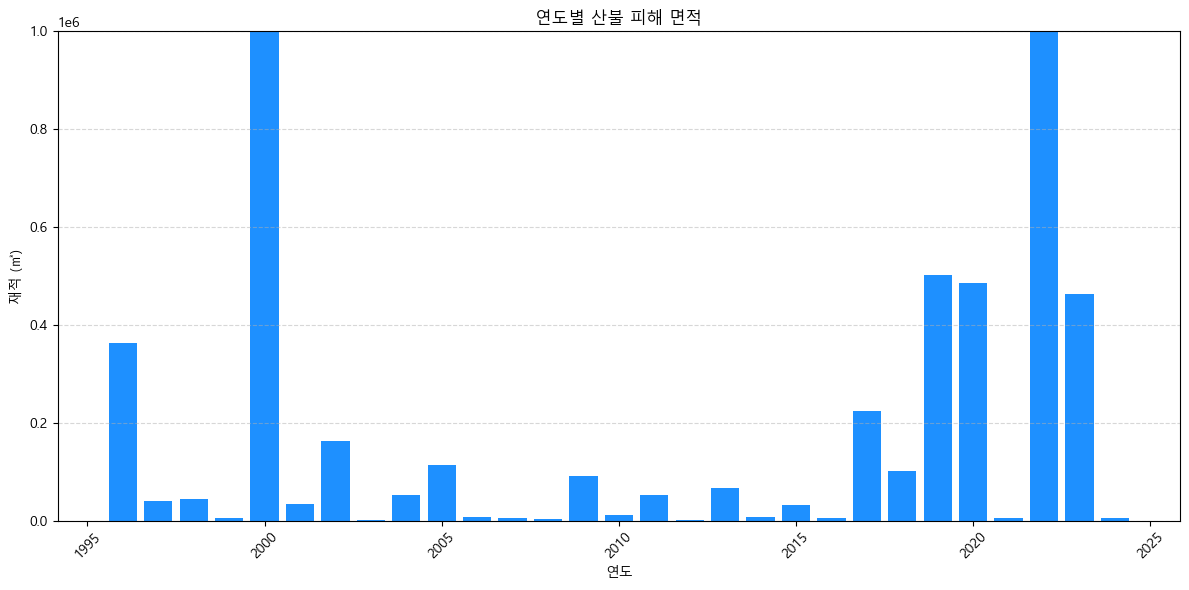

In [12]:
# ----------------------------------------
# 당겨보기
# plt.ylim(0,10000000)
# ----------------------------------------

plt.figure(figsize=(12, 6))
plt.bar(df.index, df[('산불피해', '재적 (㎥)')], color='#1E90FF')

plt.title('연도별 산불 피해 면적')
plt.xlabel('연도')
plt.ylabel('재적 (㎥)')
plt.ylim(0, 1000000)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 연도별 산불 피해 금액

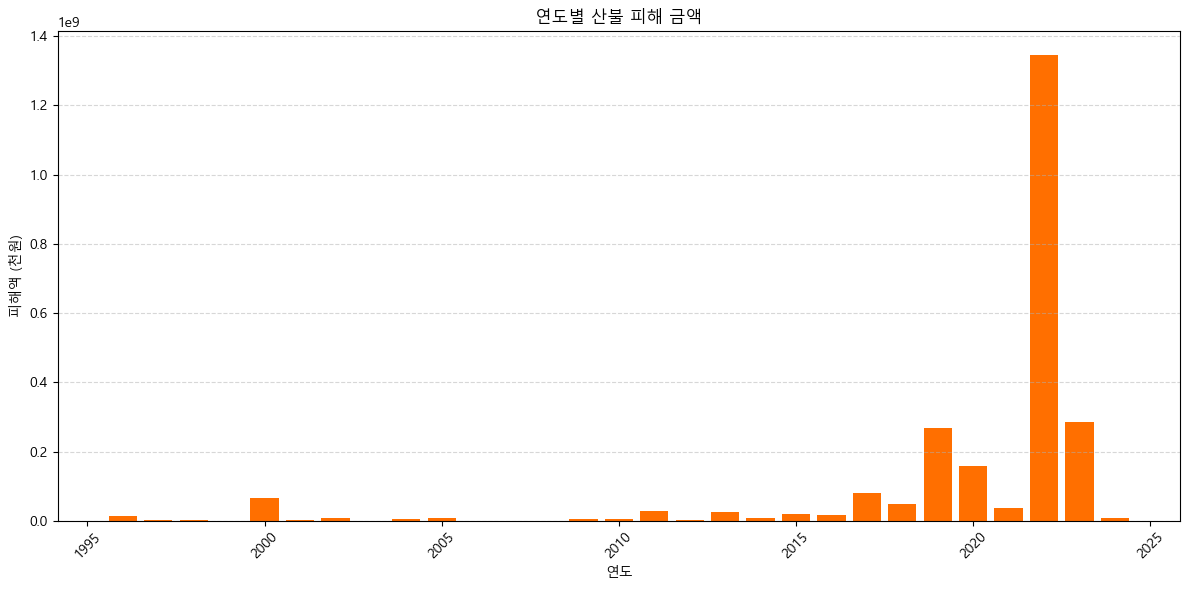

In [13]:
# ----------------------------------------
# 시각화
# color='#FF6F00'
# ----------------------------------------

plt.figure(figsize=(12, 6))

# 📌 막대그래프 생성 (색상은 #FF6F00, 넓이 조정해서 꽉 차게)
plt.bar(
    df.index,
    df[('산불피해', '피해액 (천원)')],
    color='#FF6F00',
    width=0.8
)

# 제목, 축 설정
plt.title('연도별 산불 피해 금액')
plt.xlabel('연도')
plt.ylabel('피해액 (천원)')

# x축 눈금 회전
plt.xticks(rotation=45)

# 격자 추가 (y축만 점선 스타일)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()

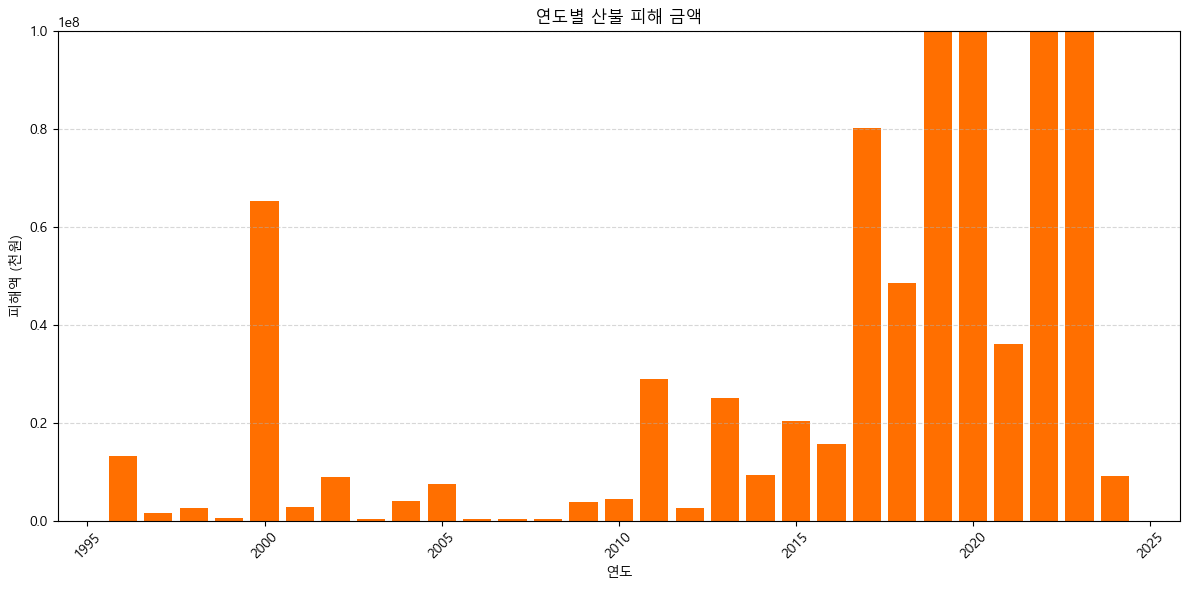

In [14]:
# ----------------------------------------
# 당겨보기
# plt.ylim(0,10000000)
# ----------------------------------------

plt.figure(figsize=(12, 6))

# 📌 막대그래프 생성 (색상은 #FF6F00, 넓이 조정해서 꽉 차게)
plt.bar(
    df.index,
    df[('산불피해', '피해액 (천원)')],
    color='#FF6F00',
    width=0.8
)

# 제목, 축 설정
plt.title('연도별 산불 피해 금액')
plt.xlabel('연도')
plt.ylabel('피해액 (천원)')
plt.ylim(0, 100000000)

# x축 눈금 회전
plt.xticks(rotation=45)

# 격자 추가 (y축만 점선 스타일)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 레이아웃 자동 조정
plt.tight_layout()

# 그래프 출력
plt.show()

### 연도별 인명 피해 현황

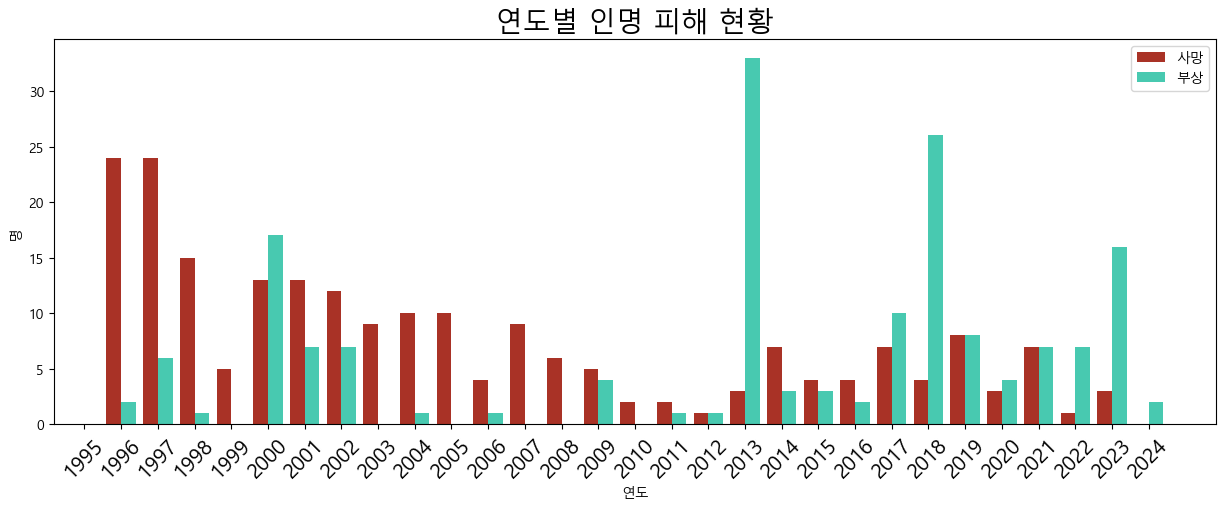

In [15]:
# ----------------------------------------
# 사망, 부상
# color='#A93226'
# color='#48C9B0'
# ----------------------------------------

x = df.index
y1 = df[('인명피해 (명)', '사망')]
y2 = df[('인명피해 (명)', '부상')]

plt.figure(figsize = (15,5))
plt.bar(x-0.2, y1, label='사망', color='#A93226', width=0.4)
plt.bar(x+0.2, y2, label='부상', color='#48C9B0', width=0.4)
plt.xticks(range(1995,2025))
plt.legend()
plt.xlabel('연도')
plt.ylabel('명')
plt.title('연도별 인명 피해 현황', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
pass

## 산불 원인

In [23]:
# ---------------------------------
# 산불 원인 컬럼만 가져와서 서브셋 생성
# ---------------------------------

cause_df = df['원인 (건)'].copy()

In [24]:
# ---------------------------------
# 컬럼명 정리
# 중첩컬럼에서 1레벨 컬럼만 선택 : get_level_values(1)
# ---------------------------------

cause_df.columns.name = None  # 상단 레벨 제거
cause_df.columns = cause_df.columns.get_level_values(0)

In [25]:
# ---------------------------------
# 컬럼별 평균 건수 
#   - 데이터프레임.mean()
#   - 내림차순 정렬
# ---------------------------------

if '합계' in cause_df.columns:
    cause_df.drop(columns='합계', inplace=True)

if '규반소각' in cause_df.columns:
    cause_df.drop(columns='규반소각', inplace=True)

mean_counts = cause_df.mean().sort_values(ascending=False)

print(mean_counts)

입산자실화     182.689655
기타         95.068966
논밭두렁소각     73.413793
쓰레기소각      48.448276
담뱃불실화      34.586207
성묘객실화      22.758621
건축물화재      13.379310
어린이불장난      7.448276
dtype: float64


In [29]:
# ---------------------------------
# 원인별 컬러
# ---------------------------------

wildfire_colors = {
    '입산자실화':   '#A93226',  
    '기타':         '#E59866',  
    '논밭두렁소각': '#F7DC6F', 
    '쓰레기소각':   '#1B4F72', 
    '담뱃불실화':   '#52BE80',  
    '성묘객실화':   '#BA4A00', 
    '건축물화재':   '#5D6D7E', 
    '어린이불장난': '#A569BD' 
}

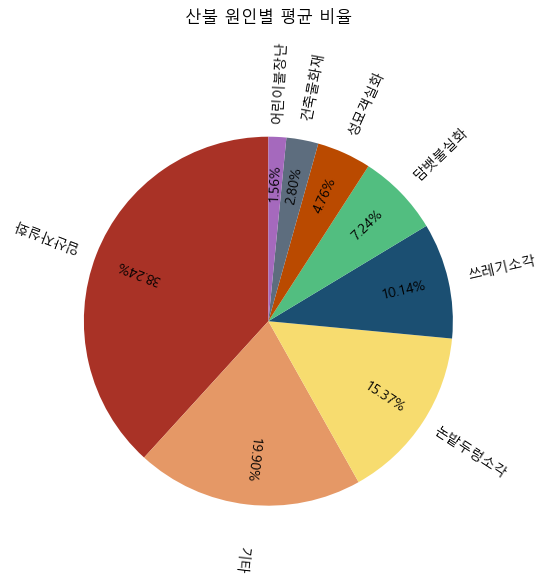

In [39]:
# ---------------------------------
# 시각화 (파이그래프)
# ---------------------------------

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    mean_counts,
    labels=mean_counts.index,
    autopct='%.2f%%',
    startangle=90,
    colors=[wildfire_colors[cause] for cause in mean_counts.index],
    labeldistance=1.3,   # 라벨을 원 밖으로
    pctdistance=0.75     # 퍼센트는 약간 안쪽에
)

# 텍스트와 퍼센트 모두 wedge의 중심 각도 방향으로 회전
for wedge, text, autotext in zip(wedges, texts, autotexts):
    angle = (wedge.theta2 + wedge.theta1) / 2
    rotation = angle if angle <= 180 else angle - 360
    
    text.set_rotation(rotation)
    text.set_horizontalalignment('center')
    autotext.set_rotation(rotation)
    autotext.set_horizontalalignment('center')

# 타이틀 등 마무리
ax.set_title('산불 원인별 평균 비율', pad=70)
ax.axis('equal')
plt.tight_layout()
plt.show()

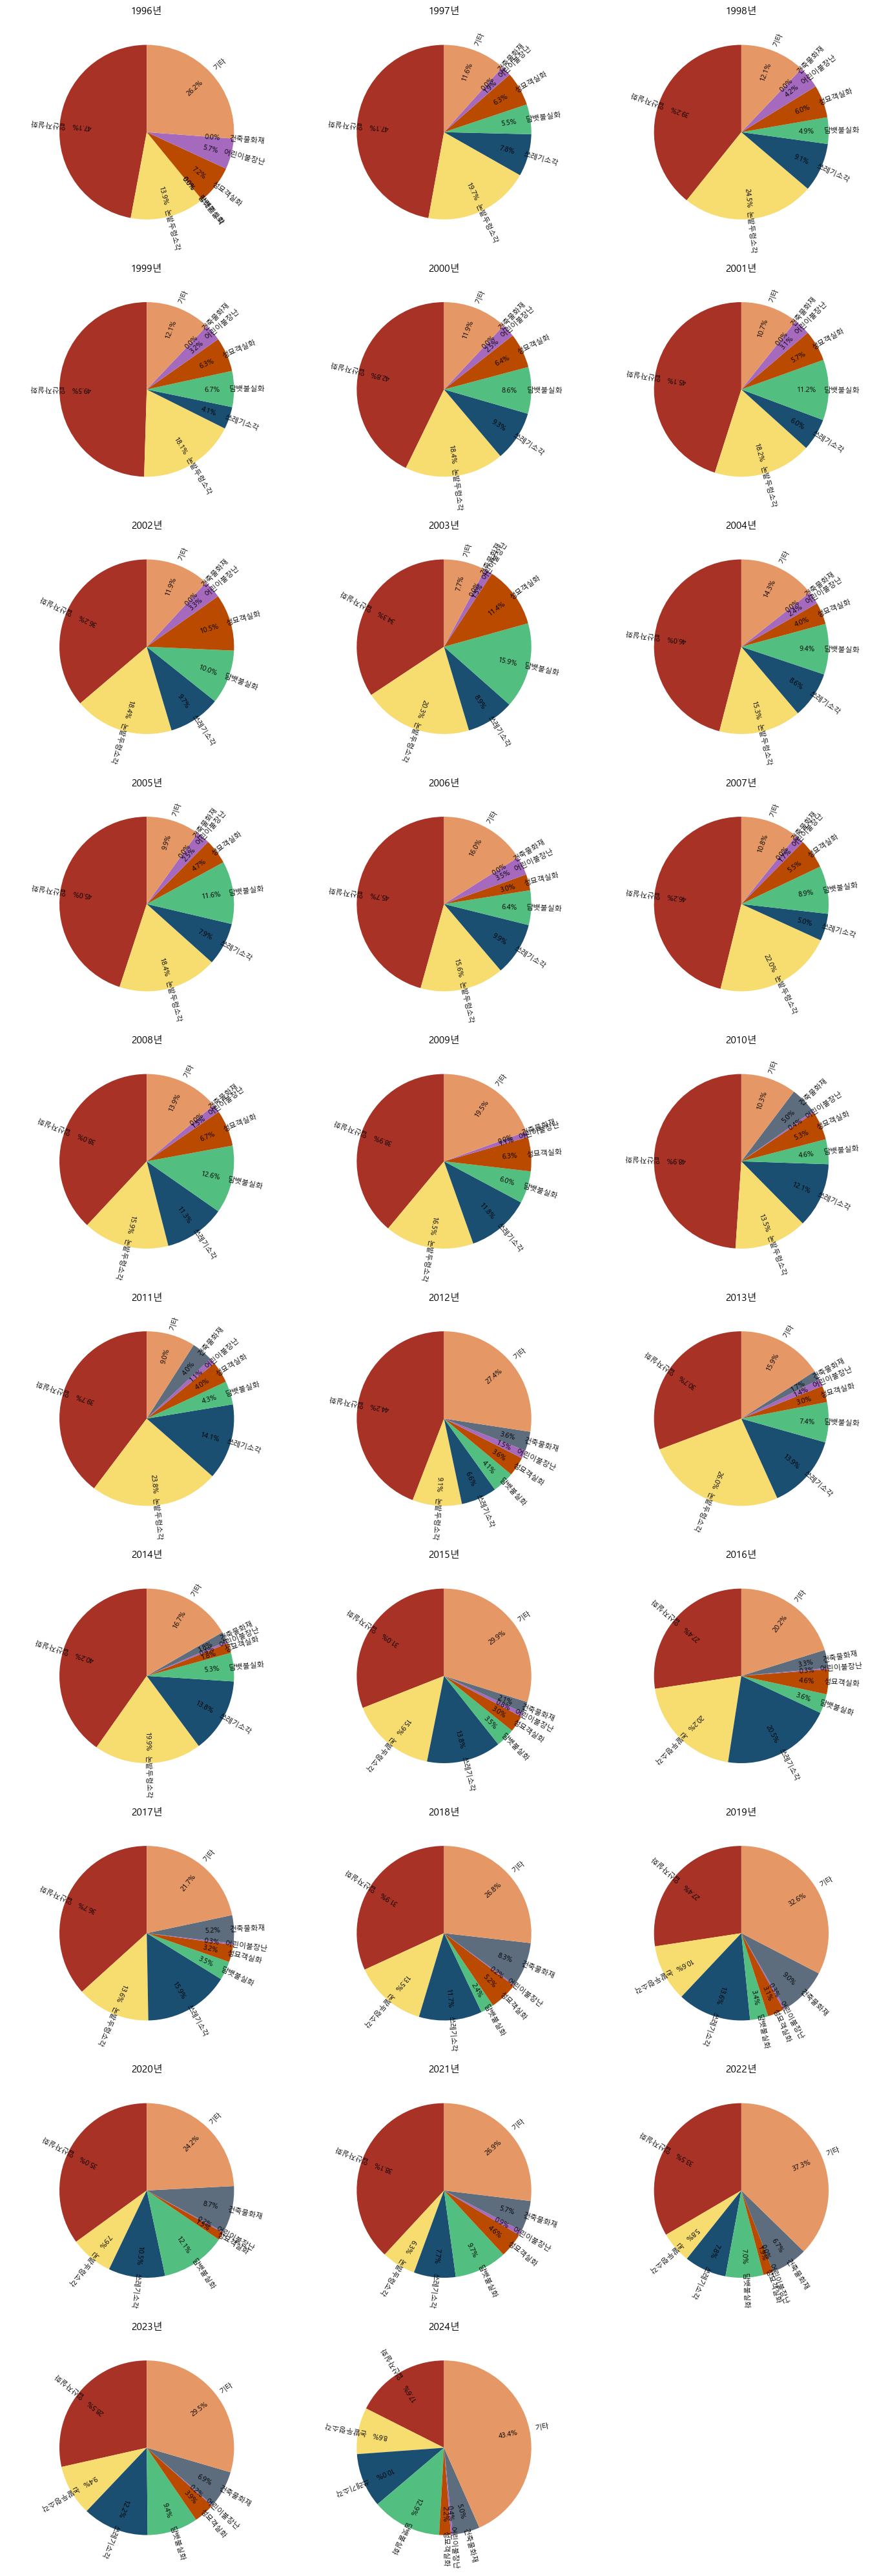

In [42]:
# ---------------------------------
# 연도별 시각화
# 서브플롯
#   - 10행 3열
# ---------------------------------

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4))

for idx, year in enumerate(years):
    row, col = divmod(idx, ncols)
    ax = axes[row, col] if nrows > 1 else axes[col]

    values = cause_df.loc[year]
    wedges, texts, autotexts = ax.pie(
        values,
        labels=values.index,
        autopct='%.1f%%',
        startangle=90,
        colors=[wildfire_colors.get(label, '#CCCCCC') for label in values.index],
        labeldistance=1.15,
        pctdistance=0.75,
        textprops={'fontsize': 8}
    )

    for wedge, text, autotext in zip(wedges, texts, autotexts):
        angle = (wedge.theta2 + wedge.theta1) / 2
        rotation = angle if angle <= 180 else angle - 360
        text.set_rotation(rotation)
        text.set_horizontalalignment('center')
        autotext.set_rotation(rotation)
        autotext.set_horizontalalignment('center')

    ax.set_title(f'{year}년', pad=25, fontsize=11)
    ax.axis('equal')

# 빈 서브플롯 제거
for i in range(n_years, nrows * ncols):
    row, col = divmod(i, ncols)
    fig.delaxes(axes[row, col] if nrows > 1 else axes[col])

plt.tight_layout()
plt.show()


## 1. 전체 평균 분석

- **임산자실화**가 전체 산불 원인 중 가장 높은 비율(38.24%)을 차지함.  
- **기타**(19.90%)와 **논밭두렁소각**(15.37%)이 뒤를 잇는 주요 원인임.  
- **쓰레기소각**(10.14%)과 **담뱃불실화**(7.24%)도 일정한 비중을 유지함.  
- **성묘객실화, 건축물화재, 어린이불장난** 등은 모두 5% 미만으로 낮은 수준임.

>  **상위 3개 원인**(임산자실화, 기타, 논밭두렁소각)만으로 전체의 약 73.5% 차지함.

## 2. 연도별 추이 분석

### 공통 패턴

- **임산자실화**는 대부분 연도에서 1위 원인으로 나타남.  
- **기타 항목**은 2012년 이후 빠르게 증가했으며, 2024년에는 43.4%로 전체 1위임.  
- **논밭두렁소각**은 초반에 비중이 높았으나 점차 감소함.

### 변화 포인트

- **담뱃불실화, 쓰레기소각**은 전체적으로 큰 변화 없이 유지됨.  
- **건축물화재, 어린이불장난, 성묘객실화** 등은 일관되게 낮은 비중 유지함.  
- **2024년**에는 ‘기타’가 급증하고 ‘임산자실화’가 감소한 것이 가장 눈에 띄는 변화임.

## 3. 결론

- **임산자실화는 핵심 원인이었으나, 2020년대 들어 기타가 대두되는 추세**임.  
-  **기타 항목의 세분화 필요**
    - ‘기타’가 최근 급증하는 것은 분류의 불명확성 또는 신고 기준 변화에 의한 것일 수 있음.